In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape,test.shape)

(54808, 14) (23490, 13)


In [2]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# Finding Percentage of missing Values

In [5]:
miss_percent_values = 100*(train.isnull().sum()/len(train))
miss_percent_values

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [6]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [7]:
train.replace(('''Bachelor's''','''Master's & above''','Below Secondary'),(4,3,1),inplace = True)
test.replace(('''Bachelor's''','''Master's & above''','Below Secondary'),(4,3,1),inplace = True)

In [8]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,3.0,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,4.0,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,4.0,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,4.0,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,4.0,m,other,1,45,3.0,2,0,0,73,0


In [9]:
train.apply(lambda x: len(x.unique()))

employee_id             54808
department                  9
region                     34
education                   4
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [10]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [11]:
train.dtypes

employee_id               int64
department               object
region                   object
education               float64
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [12]:
for col in ('education','previous_year_rating'):
    train[col].fillna(train[col].mean(), inplace = True)

In [13]:
for col in ('education','previous_year_rating'):
    test[col].fillna(test[col].mean(), inplace = True)

In [14]:
# Finding Co-relation of variable among Target variables
corelation = train.corr()['is_promoted'].sort_values()
corelation

no_of_trainings        -0.024896
education              -0.020011
age                    -0.017166
length_of_service      -0.010670
employee_id             0.001206
previous_year_rating    0.153406
avg_training_score      0.181147
awards_won?             0.195871
KPIs_met >80%           0.221582
is_promoted             1.000000
Name: is_promoted, dtype: float64

# Finding co-relation and plotting a heatmap diagram

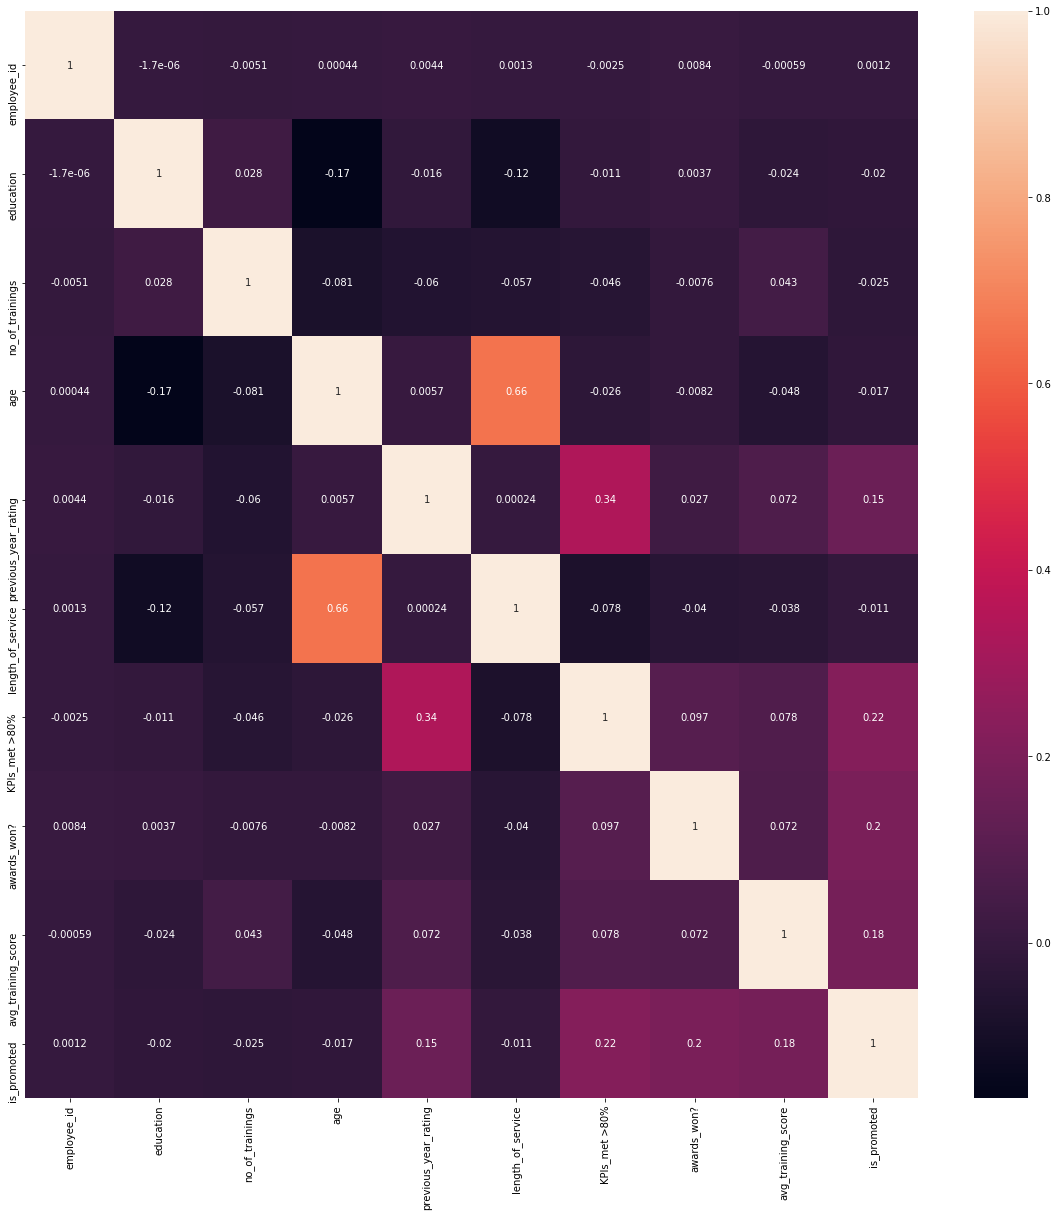

In [15]:
cormat = train.corr()
top_corr_features = cormat.index
plt.figure(figsize = (20,20))
#Plot heatmap
sns.heatmap(train[top_corr_features].corr(), annot = True)

In [16]:
train.drop(['department','region','recruitment_channel','gender'], axis = 1,inplace = True)
test.drop(['department','region','recruitment_channel','gender'], axis = 1, inplace = True)

In [17]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

As we see that we are dealing with unbalanced Dataset

In [18]:
from sklearn.utils import resample
#Seprate majority and minority Classes
df_majority = train[train.is_promoted == 0]
df_minority = train[train.is_promoted == 1]
# Upsample minority Class
df_minority_upsampled = resample(df_minority,replace = True,n_samples = 50140,random_state = 1234)
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
#Display New Class Counts
df_upsampled.is_promoted.value_counts()

1    50140
0    50140
Name: is_promoted, dtype: int64

In [19]:
X_train = train.drop(['employee_id','is_promoted'], axis = 1)
Y_train = train['is_promoted']
X_test = test.drop(['employee_id'], axis = 1).copy()

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Applying SelectKbest class to extract 10 most best features
bestfeature = SelectKBest(score_func = chi2,k=5)
fit = bestfeature.fit(X_train,Y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#Concat two DataFrame for better Visualization
Featurescore = pd.concat([dfcolumns,dfscores], axis = 1)
Featurescore.columns = ['Specs','Scores'] # Naming the dataframe columns
print(Featurescore.nlargest(8,'Scores')) # Print 8 best Feature scores

                  Specs       Scores
7    avg_training_score  5072.973743
6           awards_won?  2054.009313
5         KPIs_met >80%  1743.827117
3  previous_year_rating   568.767046
2                   age    27.228103
4     length_of_service    19.351084
1       no_of_trainings    10.063491
0             education     1.793329


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
print(model.feature_importances_)

[0.01899944 0.02728441 0.26462022 0.05888469 0.16970191 0.05103388
 0.04448522 0.36499023]


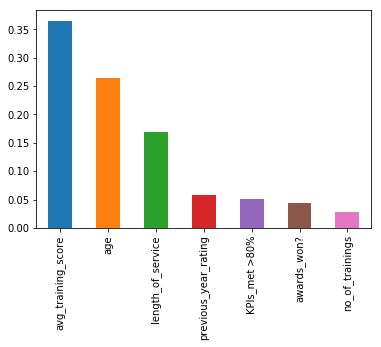

In [23]:
# plot grpah of feature importnaces for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind = 'bar')
plt.show()

# Hyper-Parameter Tuning using GridSearchCV and Randomized SearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
max_depth = [15,30,60,120]
min_samples_leaf = [3,15,25,45]
param_grid = dict(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
D_T = DecisionTreeClassifier()
grid = GridSearchCV(estimator = D_T,param_grid = param_grid, cv = 3)
start_time = time.time()
grid_result = grid.fit(X_train,Y_train)

In [25]:
print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))

Best: 0.923916 using {'max_depth': 15, 'min_samples_leaf': 45}


In [26]:
print("Execution Time:"+str((time.time()-start_time))+'ms')

Execution Time:6.931024789810181ms


In [27]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300,num = 5)]
# Number of features consider at every split  split
max_features = ['auto','sqrt']
# Maximum number of level in tree
max_depth = [int (x) for x in np.linspace(10,110,num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at leaf node
min_samples_leaf = [1,4,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 4, 10], 'bootstrap': [True, False]}


In [28]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 4, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 250,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 35,
 'bootstrap': True}

In [30]:
forest = RandomForestClassifier(n_estimators = 250,min_samples_split = 5,min_samples_leaf = 4,max_features = 'sqrt',
                                max_depth = 35,bootstrap = True)
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=35, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
Rndom_score = round(forest.score(X_train,Y_train)*100,2)
Rndom_score

92.94

In [34]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(forest,X_train,Y_train,cv = 7)
score

array([0.92669221, 0.92375479, 0.92298851, 0.92490421, 0.92541507,
       0.92528736, 0.92552376])

In [35]:
print(score.mean())

0.9249379866360466
